In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
fashion_mnist=keras.datasets.fashion_mnist

In [4]:
(train_x,train_y),(test_x,test_y)=fashion_mnist.load_data()

In [5]:
train_y #it's an array of number with index of our class_names

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [6]:
class_names=['T-shirt/Top', 'Trouser','Pullover','Dress','Coat','Sandal',
             'Shirt','Sneaker','Bag','Ankle boot']

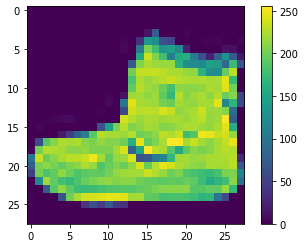

In [7]:
plt.figure()
plt.imshow(train_x[0])
plt.colorbar()
plt.grid(False)
plt.show()

## In above image you can see image pixels value falls inrange of 0 to 250

## we are going to scale it between 0 and 1 before feeding it to our model

In [8]:
train_x=train_x/255.0
test_x=test_x/255.0

## veryfying our Data

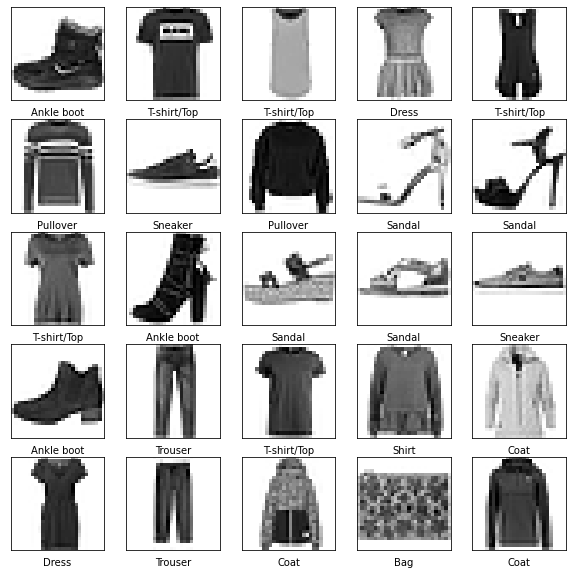

In [9]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_x[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_y[i]])
plt.show()

## building the neural network

In [10]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation=tf.nn.relu),
    keras.layers.Dense(128,activation=tf.nn.relu),
    keras.layers.Dense(10,activation=tf.nn.softmax)    #because we have 10 values to classify
])

## Compiling the model

In [11]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])


## Fitting the data

In [17]:
model.fit(train_x,train_y,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 923us/step - loss: 0.2245 - accuracy: 0.9143
Epoch 2/10
1875/1875 [==============================] - 2s 920us/step - loss: 0.2153 - accuracy: 0.9182
Epoch 3/10
1875/1875 [==============================] - 2s 927us/step - loss: 0.2090 - accuracy: 0.9203
Epoch 4/10
1875/1875 [==============================] - 2s 924us/step - loss: 0.2018 - accuracy: 0.9235
Epoch 5/10
1875/1875 [==============================] - 2s 931us/step - loss: 0.1946 - accuracy: 0.9260
Epoch 6/10
1875/1875 [==============================] - 2s 990us/step - loss: 0.1885 - accuracy: 0.9289
Epoch 7/10
1875/1875 [==============================] - 2s 947us/step - loss: 0.1855 - accuracy: 0.9297
Epoch 8/10
1875/1875 [==============================] - 2s 962us/step - loss: 0.1775 - accuracy: 0.9327
Epoch 9/10
1875/1875 [==============================] - 2s 944us/step - loss: 0.1709 - accuracy: 0.9351
Epoch 10/10
1875/1875 [==============================] - 2s 968u

## testing it on training data

In [18]:
test_loss, test_acc=model.evaluate(test_x,test_y)
print('Test accuracy',test_acc)

313/313 [==============================] - 0s 668us/step - loss: 0.3920 - accuracy: 0.8855
Test accuracy 0.8855000138282776


In [19]:
pred=model.predict(test_x)
pred[0]

313/313 [==============================] - 0s 596us/step


array([3.9895023e-12, 1.0630756e-12, 9.3611168e-15, 2.9039570e-15,
       1.6454602e-15, 1.2634897e-07, 5.8761877e-15, 5.4528855e-04,
       5.6616450e-16, 9.9945456e-01], dtype=float32)

In [20]:
np.argmax(pred[0])

9

In [22]:
test_y[0]

9

## so our model is working correctly

In [44]:
def plot_image(i,predictions_array,true_label,img):
    predictions_array,true_label,img=predictions_array[i],true_label[i],img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img,cmap=plt.cm.binary)
    
    predicted_label=np.argmax(predictions_array)
    if(predicted_label==true_label):
        color1="blue"
    else:
        color1="red"
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                      100*np.max(predictions_array),
                                      class_names[true_label]),
                                      color=color1)
def plot_value_array(i,predictions_array,true_label):
    predictions_array,true_label=predictions_array[i],true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot=plt.bar(range(10),predictions_array,color="#777777")
    plt.ylim([0,1])
    predicted_label=np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color("red")
    thisplot[true_label].set_color("green")
    

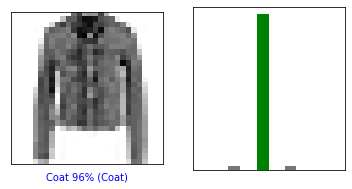

In [45]:
i=10
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,pred,test_y,test_x)
plt.subplot(1,2,2)
plot_value_array(i,pred,test_y)
plt.show()

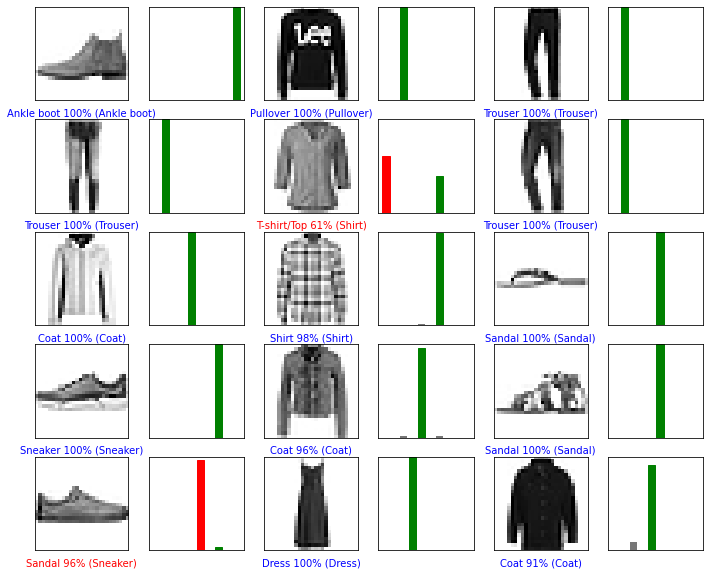

In [46]:
num_rows=5
num_col=3
num_images=num_col*num_rows
plt.figure(figsize=(2*2*num_col,2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows,2*num_col,2*i+1)
    plot_image(i,pred,test_y,test_x)
    plt.subplot(num_rows,2*num_col,2*i+2)
    plot_value_array(i,pred,test_y)
plt.show()
    

## testing against a single image

In [48]:
img=test_x[0]
print(img.shape)

(28, 28)


In [49]:
img=(np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [50]:
pred_single=model.predict(img)
print(pred_single)

1/1 [==============================] - 0s 16ms/step
[[3.9894949e-12 1.0630716e-12 9.3611168e-15 2.9039457e-15 1.6454538e-15
  1.2634884e-07 5.8761877e-15 5.4528879e-04 5.6616450e-16 9.9945456e-01]]


In [56]:
np.argmax(pred_single[0])

9

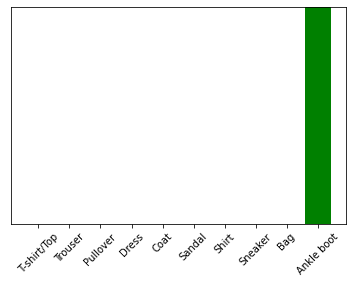

In [57]:
plot_value_array(0,pred_single,test_y)
_=plt.xticks(range(10),class_names,rotation=45)